# Importing Libraries

In [1]:
import numpy as np  
import librosa 
import soundfile,time
import os, glob, pickle
import webbrowser
import pyttsx3
import datetime
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Prerequisites for sound and extra things

In [2]:
engine=pyttsx3.init('sapi5')
#for selecting voice
voices=engine.getProperty('voices')
#print(voices[1].id)
engine.setProperty('voice',voices[1].id)

#for setting voice
newVoiceRate = 200
engine.setProperty('rate',newVoiceRate)

def speak(audio):
    engine.say(audio)
    engine.runAndWait()

def wishMe():
    hour=int(datetime.datetime.now().hour)
    if hour>=0 and hour<12:
        speak("Hey Buddy, Good Morning!")
    elif hour>=12 and hour<17:
        speak("Hey Buddy, Good Afternoon!")
    else:
        speak("Hey Buddy, Good Evening!")


# Methods to Load data and Extracting Features


In [3]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
      X = sound_file.read(dtype="float32")
      sample_rate = sound_file.samplerate
        
      if chroma:
          stft =  np.abs(librosa.stft(X))
          result = np.array([])
      if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc = 40).T,axis = 0)
        result = np.hstack((result, mfccs))
      if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis = 0)  
        result = np.hstack((result, chroma))
      if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis = 0)  
        result = np.hstack((result, mel))  
        
      ps=librosa.feature.melspectrogram(X, sr=sample_rate)
      #librosa.display.specshow(ps, y_axis='mel', x_axis='time')
      plt.figure(1)
      plt.suptitle("Audio Signal Wave...", fontsize=18)
      librosa.display.waveplot(ps, sr=sample_rate)  
      
    return result


# Emotions to observe.

In [4]:
emotions={
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised',
}

observed_emotions=['calm','happy','disgust','fearful','sad','angry']



# Program starts here

In [5]:

def load_data(test_size=0.20):
  x,y=[],[]
  for file in glob.glob("Actor_*\\*.wav"):
    file_name=os.path.basename(file)
    emotion=emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
      continue
    feature=extract_feature(file,mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)
  return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

wishMe()
speak("Give the sound file to recognize emotion")
file= input("Enter the Sound File:  ")
ipd.Audio(file)



Enter the Sound File:  Actor_10/03-01-04-01-02-02-10.wav


# Split the Dataset

C:\Users\Omkar\anaconda3\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


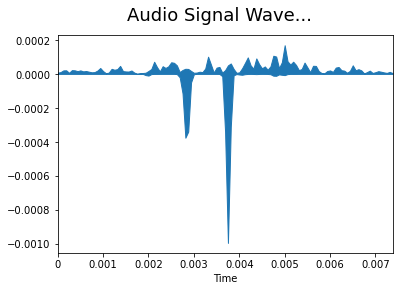

In [6]:
feature=extract_feature(file,mfcc=True, chroma=True, mel=True)

[[-4.81188660e+02  3.25236702e+01 -3.25462990e+01 ...  2.51375837e-04
   1.52081950e-04  1.92325126e-04]
 [-5.26230225e+02  3.03961811e+01 -1.01014528e+01 ...  4.13771393e-03
   2.86799669e-03  1.95074687e-03]
 [-5.17025208e+02  4.07893372e+01 -7.65372324e+00 ...  6.97660318e-04
   2.06719691e-04  9.28426307e-05]
 ...
 [-4.38355865e+02  3.67206335e+00 -4.13774834e+01 ...  3.15542449e-04
   3.17772588e-04  2.08395155e-04]
 [-5.25702209e+02  4.09430389e+01 -2.43137722e+01 ...  4.92032632e-05
   2.16024491e-05  1.82958229e-05]
 [-6.46503418e+02  5.42289848e+01  1.08538961e+01 ...  8.97055652e-05
   8.28218908e-05  7.21329998e-05]]
[[-6.40708801e+02  3.96441040e+01 -7.70041895e+00 ...  1.27587264e-04
   6.29733986e-05  3.17005179e-05]
 [-4.60704987e+02  6.80350590e+00 -3.28614273e+01 ...  6.11969910e-04
   3.96528805e-04  2.80102016e-04]
 [-6.08287415e+02  7.26724854e+01 -2.86691666e+00 ...  7.54267603e-05
   4.32104971e-05  2.46383679e-05]
 ...
 [-5.53571289e+02  3.47704163e+01 -2.4021146

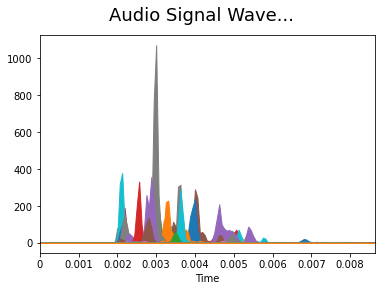

In [7]:
x_train, x_test, y_train, y_test=load_data(test_size=0.20)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


# Initializing Multilayer Perceptron Classifier

In [8]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=500, learning_rate='adaptive', max_iter=500)


# Fitting the model

In [9]:
model.fit(x_train, y_train)


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=500,
              learning_rate='adaptive', max_iter=500)

# Predict for the test set

In [10]:
y_pred=model.predict(x_test)
y_pre=model.predict([feature])
print(y_pre)
time.sleep(2)


['sad']


# Calculate the accuracy of the model

In [11]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)


# Printing the accuracy

In [12]:
print("Accuracy: {:.2f}%".format(accuracy*100))
print(y_pred)
time.sleep(2)


Accuracy: 63.64%
['sad' 'happy' 'sad' 'happy' 'sad' 'sad' 'fearful' 'angry' 'fearful'
 'fearful' 'disgust' 'calm' 'happy' 'fearful' 'happy' 'happy' 'calm'
 'calm' 'angry' 'calm' 'angry' 'calm' 'calm' 'disgust' 'disgust' 'calm'
 'calm' 'happy' 'calm' 'sad' 'sad' 'sad' 'angry' 'calm' 'angry' 'angry'
 'happy' 'sad' 'calm' 'angry' 'angry' 'happy' 'disgust' 'sad' 'calm'
 'angry' 'happy' 'angry' 'happy' 'sad' 'calm' 'disgust' 'angry' 'fearful'
 'disgust' 'angry' 'fearful' 'calm' 'happy' 'angry' 'sad' 'angry' 'angry'
 'happy' 'angry' 'disgust' 'fearful' 'angry' 'angry' 'disgust' 'angry'
 'calm' 'happy' 'sad' 'disgust' 'fearful' 'disgust' 'calm' 'angry' 'sad'
 'disgust' 'disgust' 'calm' 'sad' 'calm' 'happy' 'sad' 'fearful' 'disgust'
 'fearful' 'angry' 'disgust' 'disgust' 'sad' 'happy' 'happy' 'sad' 'happy'
 'fearful' 'happy' 'fearful' 'sad' 'angry' 'calm' 'happy' 'calm' 'happy'
 'happy' 'calm' 'happy' 'sad' 'angry' 'happy' 'happy' 'fearful' 'disgust'
 'disgust' 'disgust' 'calm' 'fearful' 'sad'

# Treating as mood

In [13]:
if y_pre=="calm":
    speak("calm")
    webbrowser.open("https://youtu.be/kF-D-k74XB4")
    
elif y_pre=="happy":
    speak("You have the best smile.Your outlook on life is amazing. You are happy.")
    webbrowser.open("https://youtu.be/PR0Lh0Y95wQ")
    
elif y_pre=="disgust":
    speak("disgust")
    webbrowser.open("https://youtu.be/fmMUCMesVtE")
    
elif y_pre=="sad":
    speak("sad")
    webbrowser.open("https://youtu.be/mmJR3Jo3RGM")
    
elif y_pre=="angry":
    speak("angry")
    webbrowser.open("https://youtu.be/RxsriyE8G9k")
    
elif y_pre=="fearful":
    speak("fearful")

else:
    speak("neutral")
    webbrowser.open("https://youtu.be/2zOztqb6lyo")
